# TCM Final Project - Heather and Allen
## Analyzing different cryptocurrencies and their changes over time

**Project description:** For our MAKE project, we decided to use what we learned in class regarding Python and Pandas and analyze a few data questions centered around cryptocurrencies, with the goal of developing a simplified investment outlook on BTC, Ethereum, Litecoin and Dogecoin!

We also decided to take this project a step further and research how to build visual graphs into Jupyter Notebook. We accomplished this through pip installing additional libraries like Seaborns, Statsmodel, and Mathplot. 

We pulled a sample dataset from Kaggle: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

**Our BIG question:** When should you invest in cryptocurrencies and which one?

**Some questions we considered:**
1. How did the historical prices / market capitalizations of various currencies change over time?
2. Can we forecast the future price of the currencies? (Heather)
3. Are there seasonal trends in price fluctuations? Cyclical changes? (Allen)

3. Which currencies are more volatile and which ones are more stable?
4. How does the price fluctuations of currencies correlate with each other?

~adapted from another project's structure, fix later for our specific project
# Table of Contents

### I. Introduction & Cleaning

    a. Importing Datasets
    b. Cleaning Individual Datasets  to Prepare for Appending
    c. Appending and Cleaning the Dataframe
    d. Pivoting the Dataframe
    e. Removing Single Observation Firms

### II. Framing our Analysis 

    a. Narrowing Down the Data

### III. Question 1

    a. Data
    b. Outliers
    c. Analysis
    d. Conclusion

### IV. Question 2

    a. Data
    b. Outliers
    c. Analysis
    d. Conclusion
    
### V. Time Series
    a. Importing New Datasets
    b. Cleaning
    c. Appending Time Series Data
    d. Combining all the Data
    e. Isolating Industries

### VI. Question 3

    a. Data
    b. Conclusion & Analysis

### VII. Question 4

    a. Data
    b. Conclusion & Analysis

### VIII. Conclusion

# 1. Import and Clean Data

In [141]:
#import relevant libraries
#must first pip install seaborn and statsmodels in VSCode

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from datetime import datetime

In [142]:
#importing Cyrptocurrency data 
bitcoin = pd.read_csv('coin_Bitcoin.csv')
ether = pd.read_csv('coin_Ethereum.csv')
dogecoin = pd.read_csv('coin_Dogecoin.csv')
litecoin = pd.read_csv('coin_Litecoin.csv')

In [143]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Name       2862 non-null   object 
 2   Symbol     2862 non-null   object 
 3   Date       2862 non-null   object 
 4   High       2862 non-null   float64
 5   Low        2862 non-null   float64
 6   Open       2862 non-null   float64
 7   Close      2862 non-null   float64
 8   Volume     2862 non-null   float64
 9   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 223.7+ KB


In [144]:
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [145]:
ether.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [146]:
dogecoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [147]:
litecoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


In [148]:
bitcoin.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11
2861,2862,Bitcoin,BTC,2021-02-27 23:59:59,48253.270101,45269.025766,46344.772237,46188.451275,4.591095e+10,8.609781e+11


In [149]:
# change to datetype
bitcoin['Date'] = bitcoin['Date'].astype(str)
ether['Date'] = ether['Date'].astype(str)
dogecoin['Date'] = dogecoin['Date'].astype(str)
litecoin['Date'] = litecoin['Date'].astype(str)

# remove the time
bitcoin['Date'] = bitcoin['Date'].str.replace(pat = ' 23:59:59', repl ='')
ether['Date'] = ether['Date'].str.replace(pat = ' 23:59:59', repl ='')
dogecoin['Date'] = dogecoin['Date'] .str.replace(pat = ' 23:59:59', repl ='')
litecoin['Date'] = litecoin['Date'] .str.replace(pat = ' 23:59:59', repl ='')


#reformat the date
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], infer_datetime_format=True, format= '%Y%m%d')
ether['Date'] = pd.to_datetime(ether['Date'], infer_datetime_format=True, format= '%Y%m%d')
dogecoin['Date'] = pd.to_datetime(dogecoin['Date'], infer_datetime_format=True, format= '%Y%m%d')
litecoin['Date'] = pd.to_datetime(litecoin['Date'], infer_datetime_format=True, format= '%Y%m%d')

In [150]:
#removing SNo column to clean up columns
bitcoin = bitcoin.drop(['SNo'], axis=1)
ether = ether.drop(['SNo'], axis = 1)
dogecoin = dogecoin.drop(['SNo'], axis=1)
litecoin = litecoin.drop(['SNo'], axis = 1)

bitcoin

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...
2857,Bitcoin,BTC,2021-02-23,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,Bitcoin,BTC,2021-02-24,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,Bitcoin,BTC,2021-02-25,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,Bitcoin,BTC,2021-02-26,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [151]:
#check columns are a float data type so we can use for calculations
bitcoin.dtypes

Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [152]:
#keeping only 2016-2021 data, so all datasets match
bitcoin = bitcoin.loc[(bitcoin["Date"] >= '2016-01-01')]
ether = ether.loc[(ether["Date"] >= '2016-01-01')]
dogecoin = dogecoin.loc[(dogecoin["Date"] >= '2016-01-01')]
litecoin = litecoin.loc[(litecoin['Date'] >= '2016-01-01')]

In [153]:
#create a new column called DailyChange (% change in price between open and closing)
bitcoin['DailyChange'] = (bitcoin['Open'] - bitcoin['Close'])/bitcoin['Open']
ether['DailyChange'] = (ether['Open'] - ether['Close'])/ether['Open']
dogecoin['DailyChange'] = (dogecoin['Open'] - dogecoin['Close'])/dogecoin['Open']
litecoin['DailyChange'] = (litecoin['Open'] - litecoin['Close'])/litecoin['Open']


<ipython-input-153-809e69f494f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin['DailyChange'] = (bitcoin['Open'] - bitcoin['Close'])/bitcoin['Open']


In [154]:
bitcoin['DailyChange'].describe()

count    1885.000000
mean       -0.003189
std         0.039587
min        -0.254702
25%        -0.017773
50%        -0.002193
75%         0.011406
max         0.371869
Name: DailyChange, dtype: float64

# 2. Initial Descriptive Statistics

In [155]:
#looking at descriptive statistics for bitcoin
bitcoin_descriptive = bitcoin.describe()
bitcoin_descriptive

,High,Low,Open,Close,Volume,Marketcap,DailyChange
count,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1.885000e+03,1885.000000
mean,7358.253550,6945.864419,7154.465081,7178.293168,1.362054e+10,1.279721e+11,-0.003189
std,7860.880297,7254.949114,7565.134498,7615.710347,1.882449e+10,1.413577e+11,0.039587
min,374.950012,354.914001,365.072998,364.330994,2.851400e+07,5.496598e+09,-0.254702
25%,1251.609985,1215.560059,1231.920044,1231.920044,4.227060e+08,2.006275e+10,-0.017773
50%,6617.350000,6433.870117,6510.069824,6517.180000,5.639320e+09,1.126373e+11,-0.002193
75%,9540.465393,9231.530273,9374.929987,9375.474759,2.068151e+10,1.699888e+11,0.011406
max,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12,0.371869


In [156]:
#looking at descriptive statistics for ether
ether_descriptive = ether.describe()
ether_descriptive

,High,Low,Open,Close,Volume,Marketcap,DailyChange
count,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1.885000e+03,1885.000000
mean,287.676047,266.048742,277.361060,278.064271,5.850077e+09,2.907151e+10,-0.005414
std,325.383998,294.912770,311.369588,312.362349,8.260745e+09,3.386433e+10,0.059219
min,0.954822,0.929835,0.933712,0.937124,2.060620e+05,7.117666e+07,-0.337189
25%,51.274502,48.297100,49.971401,50.037300,1.456020e+08,4.553738e+09,-0.028227
50%,206.361445,194.783997,200.608867,200.635000,2.208720e+09,2.089154e+10,-0.000638
75%,364.438995,341.416992,353.202267,353.362266,8.446546e+09,3.675680e+10,0.020766
max,2036.286493,1896.684508,1959.902977,1960.164744,6.073363e+10,2.249103e+11,0.423088


In [157]:
#looking at descriptive statistics for dogecoin
doge_descriptive = dogecoin.describe()
doge_descriptive

,High,Low,Open,Close,Volume,Marketcap,DailyChange
count,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1.885000e+03,1885.000000
mean,0.003452,0.003017,0.003220,0.003242,1.481319e+08,3.925630e+08,-0.006334
std,0.007852,0.006236,0.006992,0.007055,9.963038e+08,9.029127e+08,0.108158
min,0.000138,0.000134,0.000134,0.000135,4.147720e+04,1.379595e+07,-3.556254
25%,0.000483,0.000436,0.000453,0.000451,1.673200e+06,4.896589e+07,-0.018657
50%,0.002481,0.002327,0.002406,0.002409,1.699374e+07,2.886411e+08,0.001194
75%,0.003244,0.003019,0.003134,0.003140,6.405696e+07,3.717361e+08,0.019641
max,0.084945,0.068525,0.078773,0.078825,2.540331e+10,1.011246e+10,0.397983


In [158]:
#looking at descriptive statistics for litecoin
litecoin_descriptive = litecoin.describe()
litecoin_descriptive

,High,Low,Open,Close,Volume,Marketcap,DailyChange
count,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1.885000e+03,1885.000000
mean,62.773786,57.692113,60.325073,60.398379,1.697506e+09,3.594282e+09,-0.003373
std,59.538790,52.984009,56.452743,56.464574,2.342053e+09,3.297088e+09,0.058186
min,3.055340,2.919460,2.965720,2.996780,5.074800e+05,1.320557e+08,-0.670443
25%,11.002100,9.931880,10.342100,10.421600,6.113700e+07,5.281965e+08,-0.021926
50%,51.252319,47.715779,49.464957,49.458046,4.842540e+08,3.032855e+09,0.000556
75%,79.649200,74.149942,76.931999,76.942497,2.759602e+09,4.723825e+09,0.020017
max,375.286011,335.674988,359.125000,358.335999,1.799426e+10,1.948262e+10,0.361582


In [159]:
#combine all datasets to compare together using append
df_all = bitcoin.append(ether)
df_all = df_all.append(dogecoin)
df_all = df_all.append(litecoin)

df_all

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,DailyChange
977,Bitcoin,BTC,2016-01-01,436.246002,427.515015,430.721008,434.334015,3.627890e+07,6.529300e+09,-0.008388
978,Bitcoin,BTC,2016-01-02,436.062012,431.869995,434.622009,433.437988,3.009660e+07,6.517390e+09,0.002724
979,Bitcoin,BTC,2016-01-03,433.743011,424.705994,433.578003,430.010986,3.963380e+07,6.467430e+09,0.008227
980,Bitcoin,BTC,2016-01-04,434.516998,429.084015,430.061005,433.091003,3.847750e+07,6.515713e+09,-0.007046
981,Bitcoin,BTC,2016-01-05,434.182007,429.675995,433.069000,431.959991,3.452260e+07,6.500393e+09,0.002561
...,...,...,...,...,...,...,...,...,...,...
2857,Litecoin,LTC,2021-02-23,208.369670,159.684673,208.123407,176.934915,1.094470e+10,1.177356e+10,0.149856
2858,Litecoin,LTC,2021-02-24,189.165459,169.789009,176.966769,181.378501,7.205360e+09,1.207051e+10,-0.024930
2859,Litecoin,LTC,2021-02-25,204.743842,176.032145,181.385422,178.901843,7.327999e+09,1.190489e+10,0.013692
2860,Litecoin,LTC,2021-02-26,182.075844,163.248248,179.128519,170.398153,7.875998e+09,1.134030e+10,0.048738


In [160]:
# dataframe to describe and compare individual coins
df_all.groupby("Name")[["Close", "DailyChange"]].describe()

Close                                                     \
           count         mean          std         min          25%   
Name                                                                  
Bitcoin   1885.0  7178.293168  7615.710347  364.330994  1231.920044   
Dogecoin  1885.0     0.003242     0.007055    0.000135     0.000451   
Ethereum  1885.0   278.064271   312.362349    0.937124    50.037300   
Litecoin  1885.0    60.398379    56.464574    2.996780    10.421600   

                                                 DailyChange            \
                  50%          75%           max       count      mean   
Name                                                                     
Bitcoin   6517.180000  9375.474759  57539.943668      1885.0 -0.003189   
Dogecoin     0.002409     0.003140      0.078825      1885.0 -0.006334   
Ethereum   200.635000   353.362266   1960.164744      1885.0 -0.005414   
Litecoin    49.458046    76.942497    358.335999      1885.0 -0.003373   

                                                                      
               std       min       25%       50%       75%       max  
Name                                                                  
Bitcoin   0.039587 -0.254702 -0.017773 -0.002193  0.011406  0.371869  
Dogecoin  0.108158 -3.556254 -0.018657  0.001194  0.019641  0.397983  
Ethereum  0.059219 -0.337189 -0.028227 -0.000638  0.020766  0.423088  
Litecoin  0.058186 -0.670443 -0.021926  0.000556  0.020017  0.361582

## Question 1 - How did the historical prices / market capitalizations of various currencies change over time?

Text(0.5, 1.0, 'Litecoin')

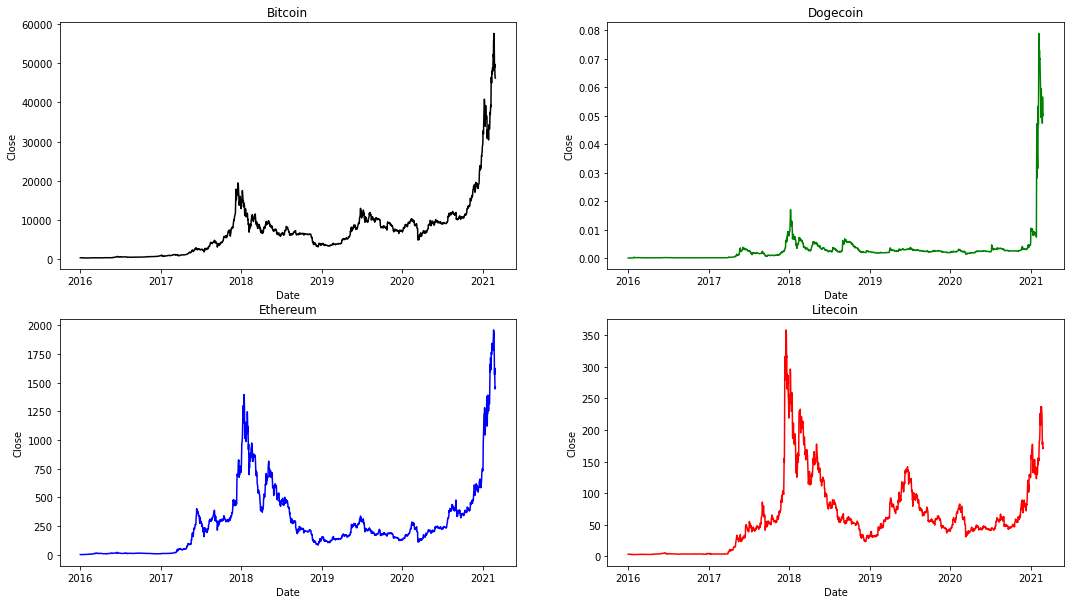

In [161]:
fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(18,10)

#Bitcoin graph
ax = sns.lineplot(data = bitcoin, x = "Date", y = "Close", ax=axs[0, 0], color='black')
ax.set_title('Bitcoin')

#Ethereum graph
ax2 = sns.lineplot(data = ether, x = "Date", y = "Close", ax=axs[1, 0], color='blue')
ax2.set_title('Ethereum')

#Dogecoin graph
ax3 = sns.lineplot(data = dogecoin, x = "Date", y = "Close", ax=axs[0, 1], color='green')
ax3.set_title('Dogecoin')

#Litecoin graph
ax4 = sns.lineplot(data = litecoin, x = "Date", y = "Close", ax=axs[1, 1], color='red')
ax4.set_title('Litecoin')

hi allen idk how to label each individaul graph 

hi heather - i gotchu!

**Takeaway:** Generally looking at the graphs, we see a corresponding spike in 2018 followed by a small spike in mid 2019 and a surge in 2021 in all respective cryptocurrencies. Dogecoin doesn't follow the pattern as precisely as the other three

## Question 2 woohoo

In [162]:
var1 = bitcoin['Close']
var2 = ether['Close']
var3 = dogecoin['Close']
var4 = litecoin['Close']

In [163]:
#i need to filter out most of the data first, only first of each month?

#fit1_bitcoin = SimpleExpSmoothing(var1).fit(optimized = True)
#fit1_bitcoin.summary()

## Question 3 - Are there seasonal trends or cyclical changes in price fluctuations? 

In [164]:
#double check dataset
df_all

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,DailyChange
977,Bitcoin,BTC,2016-01-01,436.246002,427.515015,430.721008,434.334015,3.627890e+07,6.529300e+09,-0.008388
978,Bitcoin,BTC,2016-01-02,436.062012,431.869995,434.622009,433.437988,3.009660e+07,6.517390e+09,0.002724
979,Bitcoin,BTC,2016-01-03,433.743011,424.705994,433.578003,430.010986,3.963380e+07,6.467430e+09,0.008227
980,Bitcoin,BTC,2016-01-04,434.516998,429.084015,430.061005,433.091003,3.847750e+07,6.515713e+09,-0.007046
981,Bitcoin,BTC,2016-01-05,434.182007,429.675995,433.069000,431.959991,3.452260e+07,6.500393e+09,0.002561
...,...,...,...,...,...,...,...,...,...,...
2857,Litecoin,LTC,2021-02-23,208.369670,159.684673,208.123407,176.934915,1.094470e+10,1.177356e+10,0.149856
2858,Litecoin,LTC,2021-02-24,189.165459,169.789009,176.966769,181.378501,7.205360e+09,1.207051e+10,-0.024930
2859,Litecoin,LTC,2021-02-25,204.743842,176.032145,181.385422,178.901843,7.327999e+09,1.190489e+10,0.013692
2860,Litecoin,LTC,2021-02-26,182.075844,163.248248,179.128519,170.398153,7.875998e+09,1.134030e+10,0.048738


**Quarters:**
<br> January, February, and March (Q1)
<br> April, May, and June (Q2)
<br> July, August, and September (Q3)
<br> October, November, and December (Q4)

In [165]:
df_all.dtypes

Name                   object
Symbol                 object
Date           datetime64[ns]
High                  float64
Low                   float64
Open                  float64
Close                 float64
Volume                float64
Marketcap             float64
DailyChange           float64
dtype: object

In [166]:
#separate month, year, and day so we can group them into quarters
df_test = df_all.drop(['Date'], axis = 1)

df_test['Day'] = df_all['Date'].dt.day
df_test['Month'] = df_all['Date'].dt.month
df_test['Year'] = df_all['Date'].dt.year

df_test

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,DailyChange,Day,Month,Year
977,Bitcoin,BTC,436.246002,427.515015,430.721008,434.334015,3.627890e+07,6.529300e+09,-0.008388,1,1,2016
978,Bitcoin,BTC,436.062012,431.869995,434.622009,433.437988,3.009660e+07,6.517390e+09,0.002724,2,1,2016
979,Bitcoin,BTC,433.743011,424.705994,433.578003,430.010986,3.963380e+07,6.467430e+09,0.008227,3,1,2016
980,Bitcoin,BTC,434.516998,429.084015,430.061005,433.091003,3.847750e+07,6.515713e+09,-0.007046,4,1,2016
981,Bitcoin,BTC,434.182007,429.675995,433.069000,431.959991,3.452260e+07,6.500393e+09,0.002561,5,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
2857,Litecoin,LTC,208.369670,159.684673,208.123407,176.934915,1.094470e+10,1.177356e+10,0.149856,23,2,2021
2858,Litecoin,LTC,189.165459,169.789009,176.966769,181.378501,7.205360e+09,1.207051e+10,-0.024930,24,2,2021
2859,Litecoin,LTC,204.743842,176.032145,181.385422,178.901843,7.327999e+09,1.190489e+10,0.013692,25,2,2021
2860,Litecoin,LTC,182.075844,163.248248,179.128519,170.398153,7.875998e+09,1.134030e+10,0.048738,26,2,2021


In [176]:
#new dataframes that group data by quarters and year
#2016
q1_2016 = df_test.loc[(df_test["Month"] >= 1) & (df_test["Month"] <= 3) & (df_test["Year"] == 2016)]
q2_2016 = df_test.loc[(df_test["Month"] >= 4) & (df_test["Month"] <= 6) & (df_test["Year"] == 2016)]
q3_2016 = df_test.loc[(df_test["Month"] >= 7) & (df_test["Month"] <= 9) & (df_test["Year"] == 2016)]
q4_2016 = df_test.loc[(df_test["Month"] >= 10) & (df_test["Month"] <= 12) & (df_test["Year"] == 2016)]

In [177]:
q1_2016

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,DailyChange,Day,Month,Year
977,Bitcoin,BTC,436.246002,427.515015,430.721008,434.334015,36278900.0,6.529300e+09,-0.008388,1,1,2016
978,Bitcoin,BTC,436.062012,431.869995,434.622009,433.437988,30096600.0,6.517390e+09,0.002724,2,1,2016
979,Bitcoin,BTC,433.743011,424.705994,433.578003,430.010986,39633800.0,6.467430e+09,0.008227,3,1,2016
980,Bitcoin,BTC,434.516998,429.084015,430.061005,433.091003,38477500.0,6.515713e+09,-0.007046,4,1,2016
981,Bitcoin,BTC,434.182007,429.675995,433.069000,431.959991,34522600.0,6.500393e+09,0.002561,5,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Litecoin,LTC,3.324950,3.225090,3.231820,3.303600,2089890.0,1.490016e+08,-0.022210,27,3,2016
1064,Litecoin,LTC,3.302910,3.256820,3.302910,3.264060,1427140.0,1.472656e+08,0.011762,28,3,2016
1065,Litecoin,LTC,3.283000,3.196290,3.261760,3.226330,1764730.0,1.456096e+08,0.010862,29,3,2016
1066,Litecoin,LTC,3.277020,3.203010,3.226650,3.219410,1450290.0,1.453430e+08,0.002244,30,3,2016
